In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("./"))

['.gitignore', '.ipynb_checkpoints', 'AffineOnlyTransform.ipynb', 'atlas_affine_vol.npz', 'data', 'ext', 'LICENSE.md', 'model.png', 'models', 'Process_data.ipynb', 'README.md', 'src', 'test_affine_vol.npz', 'Voxel_morph_v3.ipynb']


In [4]:
%matplotlib inline
import sys
import glob

# third party
import tensorflow as tf
import scipy.io as sio
from keras.backend.tensorflow_backend import set_session
from scipy.interpolate import interpn
import matplotlib.pyplot as plt

In [5]:
vm_dir = "./"
sys.path.append(os.path.join(vm_dir, 'src'))
sys.path.append(os.path.join(vm_dir, 'ext', 'medipy-lib'))
sys.path.append(os.path.join(vm_dir, 'ext', 'neuron'))
sys.path.append(os.path.join(vm_dir, 'ext', 'pynd-lib'))
sys.path.append(os.path.join(vm_dir, 'ext', 'pytool-lib'))
import networks
import medipy
from medipy.metrics import dice
import datagenerators

In [6]:
# load Atals data
labels = sio.loadmat(os.path.join(vm_dir, 'data', 'labels.mat'))['labels'][0]
atlas = np.load(os.path.join(vm_dir, 'data', 'atlas_norm.npz'))
# Print what is inside the atlas
for key, value in atlas.items():
    print(key)
atlas_vol = atlas['vol']
atlas_seg = atlas['seg']
# Expand the dimension of the input: the first number is the number of the data, and the last one is the channel number
atlas_vol = np.expand_dims(np.expand_dims(atlas_vol, 0), -1)
print(atlas_vol.shape, atlas_seg.shape)

vol
seg
train_avg
(1, 160, 192, 224, 1) (160, 192, 224)


In [7]:
gpu = '/gpu:0'
os.environ["CUDA_VISIBLE_DEVICES"] = str(0)

In [8]:
vol_size=(160,192,224)
nf_enc=[16,32,32,32]
nf_dec=[32,32,32,32,32,16,16]

In [9]:
with tf.device(gpu):
    net = networks.cvpr2018_net(vol_size, nf_enc, nf_dec)

2
(160, 192, 224)
2
(160, 192, 224)
2
(160, 192, 224)
2
(160, 192, 224)
2
(160, 192, 224)
2
(160, 192, 224)
2
(160, 192, 224)
2
(160, 192, 224)


In [ ]:
from keras.utils import plot_model
plot_model(net, to_file='model.png', show_shapes=True)

In [24]:
test_affine = np.load('./data/test_affine/test_affine_1.npz')

In [25]:
for k, v in test_affine.items():
    print(k)

fixed
seg
moving


In [26]:
print(test_affine['fixed'].shape)

(160, 192, 224)


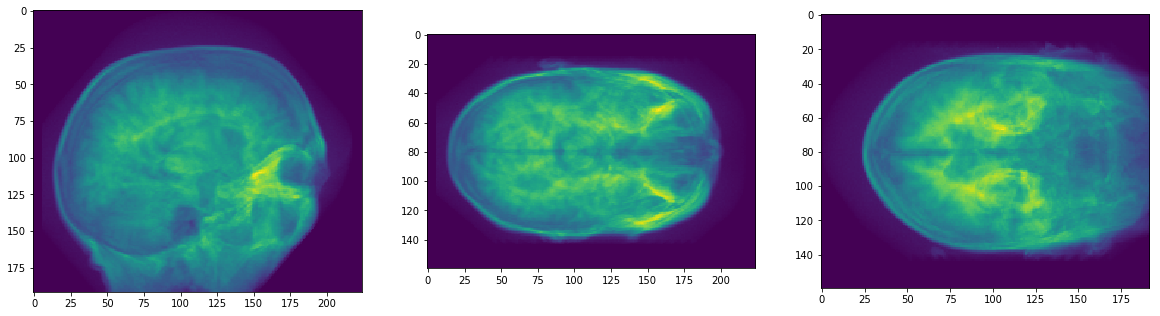

In [27]:
# show the mean of the input_test_data in each dimension
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(np.mean(test_affine['fixed'][:, :, :], axis=0))
ax2.imshow(np.mean(test_affine['fixed'][:, :, :], axis=1))
ax3.imshow(np.mean(test_affine['fixed'][:, :, :], axis=2))

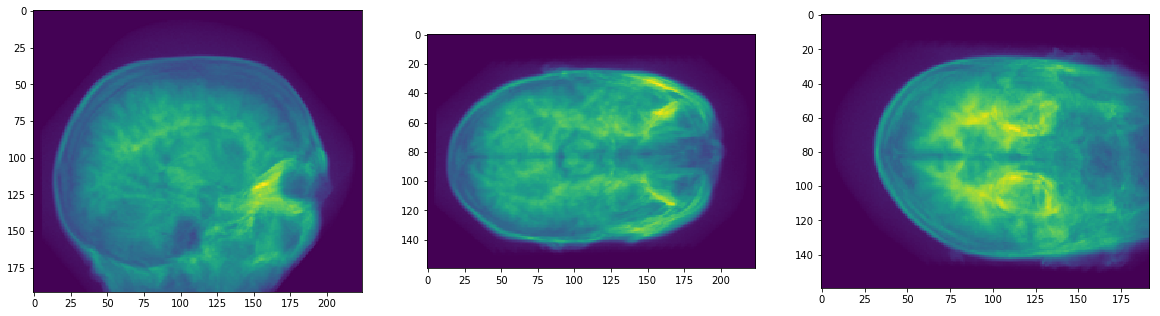

In [14]:
# show the mean of the input_test_data in each dimension
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.imshow(np.mean(test_affine['moving'][:, :, :], axis=0))
ax2.imshow(np.mean(test_affine['moving'][:, :, :], axis=1))
ax3.imshow(np.mean(test_affine['moving'][:, :, :], axis=2))

In [15]:
np.savez('test_affine_vol', vol_data=test_affine['moving'])
np.savez('atlas_affine_vol', vol_data=test_affine['fixed'])

In [36]:
print(atlas_vol[0, 80, 96, :, 0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.63265120e-03 6.85376525e-02
 1.89722359e-01 2.52468109e-01 2.71955132e-01 2.72739112e-01
 2.67677635e-01 2.63728023e-01 2.68412083e-01 2.64218688e-01
 2.55620152e-01 2.69201577e-01 2.86375463e-01 2.79673308e-01
 2.45207146e-01 2.25031331e-01 2.22828880e-01 1.92508996e-01
 1.91347346e-01 1.63421825e-01 2.25044325e-01 2.69425482e-01
 2.77012557e-01 2.69384265e-01 2.58302480e-01 2.72239149e-01
 2.12070227e-01 2.02504754e-01 1.42422199e-01 4.80955001e-03
 2.89294310e-02 2.55445167e-02 9.18324664e-03 3.79945058e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [38]:
print(test_affine['fixed'][80, 96, :])

[   0    0    0    0    0    0   63  101  138  144  112  159   99  184
  495 1499 2040 2363 1746  697  231  295  325  403  518  776  448  636
  797  418  197  233  565  719  662  377  147  259  426  584  401  363
  844  760  779 1014  985  910  848 1007  999  859  959  978  859 1062
  817  612  845  948 1172 1126 1010  722  786  843  793  817  775  603
  976 1042 1056 1000 1011  610  402  387  668  957 1283 1698 1812 1705
 1740 1758 1742 1287  843  540  404  414  406  189  317  447  284  320
  449  381  477  665  536  429  228  373  251  188  175  177  264  333
  344  104  237  521  596  212  292  614 1190 1808 1744 1502 1039  832
 1009  823  933 1081 1031  993 1077 1320  596  724 1465 1015  585  358
  249  248  446  858 1099  302  553  582  594  544  414  454  784  264
  421  690 1048 1188 1039 1131  867  385  419  418  669  602  760  659
  500  473  547  415  340  577  669  692  632  556  872 1012  277  383
  457  198  141   55  169   78  227  139   69  462  610  490 1885 2768
 2193 